In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

Reading links
https://www.kaggle.com/kabure/predicting-credit-risk-model-pipeline
https://stackoverflow.com/questions/34052115/how-to-find-the-importance-of-the-features-for-a-logistic-regression-model
https://www.kaggle.com/hendraherviawan/predicting-german-credit-default
https://www.dataschool.io/guide-to-logistic-regression/
http://nbviewer.jupyter.org/github/justmarkham/DAT8/blob/master/notebooks/12_logistic_regression.ipynb
https://www.juanshishido.com/logisticcoefficients.html
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
https://www.kaggle.com/ash316/ml-from-scratch-part-2

# Step 1 – collecting data, exploring and preparing the data

The credit dataset includes 1,000 examples of loans, plus a combination of numeric
and nominal features indicating characteristics of the loan and the loan applicant.
A class variable indicates whether the loan went into default.
Since the loan data was obtained from Germany, the currency is recorded in
Deutsche Marks (DM). It seems like a safe assumption that larger checking and
savings account balances should be related to a reduced chance of loan default. Let's see if we can
determine any patterns that predict this outcome.

In [3]:
input_data= pd.read_csv("C:/Users/hag5kor/Desktop/Shanu/ATI/Logistic_Regression/credit.csv")

In [4]:
input_data.shape

(1000, 21)

In [5]:
input_data.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'telephone', 'foreign_worker', 'job'],
      dtype='object')

In [6]:
#to know the type of each variable
input_data.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_length       object
installment_rate         int64
personal_status         object
other_debtors           object
residence_history        int64
property                object
age                      int64
installment_plan        object
housing                 object
existing_credits         int64
default                  int64
dependents               int64
telephone               object
foreign_worker          object
job                     object
dtype: object

In [7]:
input_data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [9]:
#check Null values in each column
input_data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

The data looks clean. So we can start with the analysis.

In [112]:
print(pd.crosstab(input_data.default, input_data.purpose))

purpose  business  car (new)  car (used)  domestic appliances  education  \
default                                                                    
1              63        145          86                    8         28   
2              34         89          17                    4         22   

purpose  furniture  others  radio/tv  repairs  retraining  
default                                                    
1              123       7       218       14           8  
2               58       5        62        8           1  


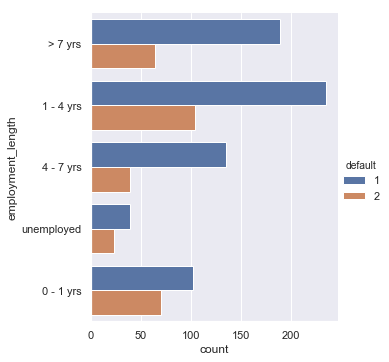

In [11]:
sns.catplot(y='employment_length', kind="count",hue='default', data=input_data);

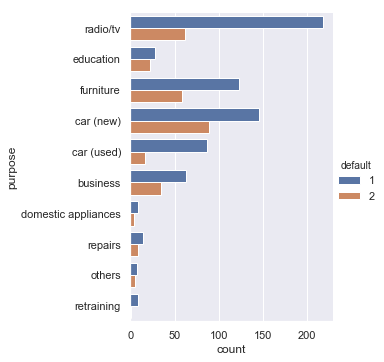

In [12]:
sns.catplot(y='purpose', kind="count",hue='default', data=input_data);

Let's take a look at some of output for a couple of features of loans that
seem likely to predict a default. The checking_balance and savings_balance
features indicate the applicant's checking and savings account balance, and are
recorded as categorical variables:

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64


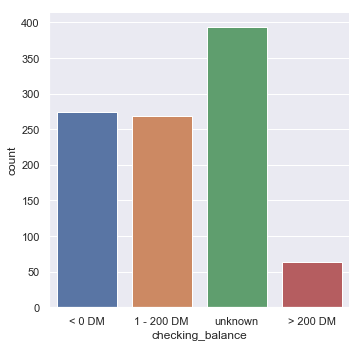

In [13]:
print(input_data['checking_balance'].value_counts())
sns.catplot(x='checking_balance', kind="count", data=input_data);

< 100 DM         603
unknown          183
101 - 500 DM     103
501 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64


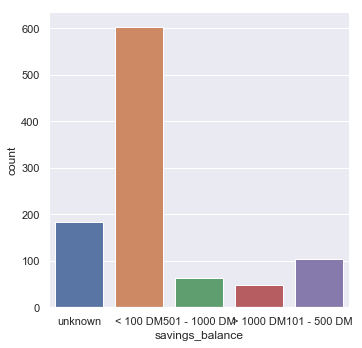

In [14]:
print(input_data['savings_balance'].value_counts())
sns.catplot(x='savings_balance', kind="count", data=input_data);

Since the loan data was obtained from Germany, the currency is recorded in
Deutsche Marks (DM). It seems like a safe assumption that larger checking and
savings account balances should be related to a reduced chance of loan default.

In [15]:
input_data.describe()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.300000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


The loan amounts ranged from 250 DM to 18,420 DM across terms of 4 to 72 months,
with a median duration of 18 months and amount of 2,320 DM.

The default variable indicates whether the loan applicant was unable to meet the
agreed payment terms and went into default. A total of 30 percent of the loans went
into default:

In [16]:
input_data['default'].value_counts()

1    700
2    300
Name: default, dtype: int64

1: No Default, 2: Default .A high rate of default is undesirable for a bank because it means that the bank is
unlikely to fully recover its investment. If we are successful, our model will identify
applicants that are likely to default, so that this number can be reduced.

# Data preparation – creating random training and test datasets
We will use 90 percent of the data for training and 10 percent for testing, which will provide us with 100 records to
simulate new applicants.

In [17]:
from sklearn.model_selection import train_test_split
#random split for  train data(90%) and test(10%)
train_data, test_data = train_test_split(input_data, test_size=0.1, random_state=31)
print("Total Training Observations:", len(train_data), "\nTotal  Test Observations:",len(test_data))

Total Training Observations: 900 
Total  Test Observations: 100


In [18]:
train_data['default'].value_counts()

1    634
2    266
Name: default, dtype: int64

In [19]:
test_data['default'].value_counts()

1    66
2    34
Name: default, dtype: int64

# Step 3 – training a model on the data

In [64]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [21]:
train_data.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'telephone', 'foreign_worker', 'job'],
      dtype='object')

In [22]:
train_data.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_length       object
installment_rate         int64
personal_status         object
other_debtors           object
residence_history        int64
property                object
age                      int64
installment_plan        object
housing                 object
existing_credits         int64
default                  int64
dependents               int64
telephone               object
foreign_worker          object
job                     object
dtype: object

In [65]:
X_train = train_data[['months_loan_duration','amount', 'installment_rate','residence_history',
                      'age','existing_credits','dependents']] 

#Create dummy variables
#That is variables with only two values, zero and one.
cat_vars=['checking_balance','credit_history','purpose','savings_balance','personal_status','other_debtors',
         'property','installment_plan','housing','telephone','foreign_worker','job']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(train_data[var], prefix=var)
    X_train= X_train.join(cat_list)
    
Y_train= train_data['default']

In [66]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
train_data= pd.concat([train_data.reset_index(drop=True), 
                         pd.DataFrame(logisticRegr.predict_proba(X_train), columns=['Class_0','Class_1'])],axis=1)

In [30]:
train_data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job,Class_0,Class_1
0,unknown,24,critical,radio/tv,2611,< 100 DM,> 7 yrs,4,married male,co-applicant,...,none,own,2,1,1,none,yes,skilled employee,0.875327,0.124673
1,unknown,15,repaid,education,4623,101 - 500 DM,1 - 4 yrs,3,single male,none,...,none,own,1,2,1,yes,yes,mangement self-employed,0.903363,0.096637
2,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,none,for free,2,2,2,none,yes,skilled employee,0.286529,0.713471
3,unknown,12,repaid,car (new),1386,501 - 1000 DM,1 - 4 yrs,2,female,none,...,none,own,1,2,1,none,yes,skilled employee,0.821543,0.178457
4,unknown,15,repaid,radio/tv,1386,unknown,1 - 4 yrs,4,married male,none,...,none,rent,1,1,1,yes,yes,skilled employee,0.956465,0.043535


# Performance check on training data

C:\Users\hag5kor\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


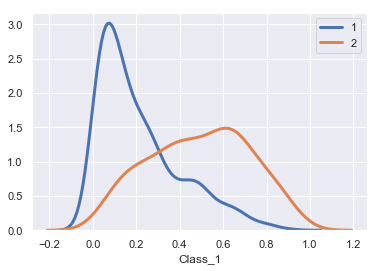

In [32]:
# Iterate through the defaults
for defaul in train_data['default'].unique():
    # Subset to the airline
    subset = train_data[train_data['default'] == defaul]
    
    # Draw the density plot
    sns.distplot(subset['Class_1'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
              label = defaul)

threshold/cut off for default can be 0.3

In [ ]:
train_data['pred_default']= 1
train_data.loc[train_data['Class_1']>0.3,'pred_default']= 2

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train_data['default'], train_data['pred_default'])
print(confusion_matrix)

[[470 164]
 [ 62 204]]


The result is telling us that we have 470+204 correct predictions and 164+62 incorrect predictions.

In [34]:
from sklearn.metrics import classification_report
print(classification_report(train_data['default'], train_data['pred_default']))

             precision    recall  f1-score   support

          1       0.88      0.74      0.81       634
          2       0.55      0.77      0.64       266

avg / total       0.79      0.75      0.76       900



In [37]:
#we can directly calculate from logistic regression model also, default cutoff is 0.5
train_data['pred_default_model']=logisticRegr.predict(X_train)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train_data['default'], train_data['pred_default_model'])
print(confusion_matrix)

[[569  65]
 [132 134]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(train_data['default'], train_data['pred_default_model']))

             precision    recall  f1-score   support

          1       0.81      0.90      0.85       634
          2       0.67      0.50      0.58       266

avg / total       0.77      0.78      0.77       900



# testing on test data

In [43]:
X_test= test_data[['months_loan_duration','amount', 'installment_rate','residence_history',
                      'age','existing_credits','dependents']] 

#Create dummy variables
#That is variables with only two values, zero and one.
cat_vars=['checking_balance','credit_history','purpose','savings_balance','personal_status','other_debtors',
         'property','installment_plan','housing','telephone','foreign_worker','job']
for var in cat_vars:
    cat_list = pd.get_dummies(test_data[var], prefix=var)
    X_test= X_test.join(cat_list)
    
# Get missing columns in the training test
missing_cols = set( X_train.columns ) - set( X_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

In [44]:
test_data= pd.concat([test_data.reset_index(drop=True), 
                         pd.DataFrame(logisticRegr.predict_proba(X_test), columns=['Class_0','Class_1'])],axis=1)

In [47]:
test_data['pred_default']= 1
test_data.loc[test_data['Class_1']>0.3,'pred_default']= 2

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_data['default'], test_data['pred_default'])
print(confusion_matrix)

[[55 11]
 [ 8 26]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(test_data['default'], test_data['pred_default']))

             precision    recall  f1-score   support

          1       0.87      0.83      0.85        66
          2       0.70      0.76      0.73        34

avg / total       0.82      0.81      0.81       100



# logistic regression coeffiecients

In [107]:
coefficients= pd.DataFrame(list(zip(logisticRegr.coef_[0,],X_train.columns)))
coefficients.columns=['Coefficients', 'Features']

In [108]:
from sklearn.preprocessing import StandardScaler
#Scale your data
scaler = StandardScaler()
scaler.fit(X_train) 
X_scaled = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns)

clf = LogisticRegression(random_state = 0)
clf.fit(X_scaled, Y_train)

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
variable_imp= pd.DataFrame([np.array(X_train.columns),feature_importance]).transpose()
variable_imp.columns= ["Features", "Importance"]
variable_imp['Importance']= variable_imp['Importance'].astype('float')

In [111]:
coe_imp_df=coefficients.merge(variable_imp)
print(coe_imp_df.sort_values(['Importance'],ascending=False))

    Coefficients                               Features  Importance
1       0.000145                                 amount  100.000000
10     -1.003433               checking_balance_unknown   98.747563
25     -0.444430                     purpose_retraining   91.962272
2       0.338145                       installment_rate   91.715308
8       0.587686                checking_balance_< 0 DM   76.063513
17      0.579620                      purpose_car (new)   67.445878
0       0.022618                   months_loan_duration   64.212923
11     -0.803956                credit_history_critical   58.667184
18     -0.838828                     purpose_car (used)   58.451769
28      0.473646               savings_balance_< 100 DM   56.492308
29     -0.741453              savings_balance_> 1000 DM   53.572355
4      -0.022568                                    age   52.728987
30     -0.539836                savings_balance_unknown   50.958005
41      0.271532                  property_unkno

In [1]:
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(logisticRegr.coef_[0,])})
print(coefficients )
print(logisticRegr.intercept_)

# Those values,is more influential
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.std(X_train, 0)*np.transpose(logisticRegr.coef_[0,])})
print(coefficients.sort_values(by= ['Coefficients']) )
print(logisticRegr.intercept_)

#second way
logisticRegr.fit(X_train / np.std(X_train, 0), Y_train)
#print(logisticRegr.coef_)
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(logisticRegr.coef_[0,])})
print(coefficients.sort_values(by= ['Coefficients']) )
print(logisticRegr.intercept_)

NameError: name 'pd' is not defined

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)

In [ ]:
train_data= pd.concat([train_data.reset_index(drop=True), 
                         pd.DataFrame(clf.predict_proba(X_train), columns=['DClass_0','DClass_1'])],axis=1)

In [ ]:
train_data=train_data.drop(['DClass_0','DClass_1'], axis=1)

In [ ]:
# Iterate through the five airlines
for airline in train_data['default'].unique():
    # Subset to the airline
    subset = train_data[train_data['default'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['DClass_1'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
              label = airline)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph